In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import math

In [2]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [4]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

#Check the frequency of each number
df_y.value_counts().sort_index()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [5]:
df_images = [X_train,X_test]
df_labels = [y_train,y_test]

result_images = pd.concat(df_images,ignore_index=True)
result_labels = pd.concat(df_labels,ignore_index=True)


In [6]:
pca_data=result_images

from sklearn.preprocessing import StandardScaler
std_data= StandardScaler().fit_transform(pca_data.astype(float))
print(std_data.shape)

(42000, 784)


In [7]:
# finding the covariance matrix : S = (1/n)* A.T*A
cov_mat=(np.matmul(std_data.T, std_data))/std_data.shape[0]
print('The shape of covariance matrix is ',cov_mat.shape)

The shape of covariance matrix is  (784, 784)


In [8]:
#finding the top two eigen values and corrsponding eigen vectors
from scipy.linalg import eigh


# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors= eigh(cov_mat, eigvals=(782,783))

print('Shape of the vectors', vectors.shape)

#since vector[0] is 2nd principal and vectors[1] is 1st principal ,therefore we need to reverse the vectors and 
# take there traspose
vectors= vectors.T
vectors=vectors[::-1]
print('updated shape of the vectors', vectors.shape)

Shape of the vectors (784, 2)
updated shape of the vectors (2, 784)


In [9]:
#projecting the original data on the new plane formed by the two eigen vectors
new_coordinates= np.matmul(vectors,std_data.T)
print('(2,784) * (784,42000)  = (2,42000)' )
print(new_coordinates.shape)

(2,784) * (784,42000)  = (2,42000)
(2, 42000)


In [10]:
new_coordinates=np.vstack((new_coordinates,result_labels)).T
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st principal", "2nd principal", "label"))
print(dataframe.head())

   1st principal  2nd principal  label
0       7.138767       2.562175    6.0
1      11.113698       2.207243    6.0
2      -2.257208       7.214693    4.0
3       0.222691       3.153018    4.0
4       3.801751      -6.157355    2.0


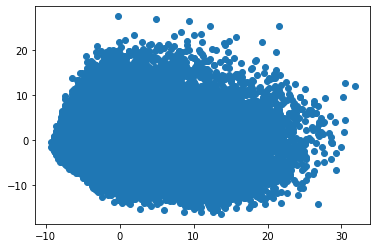

In [11]:
# scatterplot of inputs data
plt.scatter(dataframe["1st principal"], dataframe["2nd principal"])

In [12]:
# create arrays
X = dataframe.values

In [13]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(X)

NearestNeighbors()

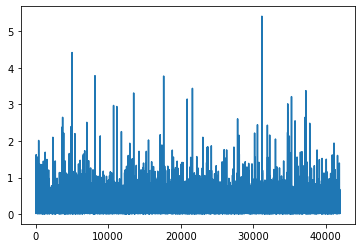

In [14]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [15]:
percentage = 5
meand = distances.mean(axis =1)
per = math.floor(len(meand)*percentage/100)
mean_arr = meand.argsort()[0-per:][::-1]
print(len(mean_arr))

2100


In [16]:
# np.argsort() return
# array of indices for
# sorted array
sorted_index_array = np.argsort(meand)
# sorted array
sorted_array = meand[sorted_index_array]
rslt = sorted_array[-per : ]

In [17]:
print(len(rslt))

2100


In [18]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) >= min(rslt))
outlier_index

(array([   18,    19,    41, ..., 41955, 41961, 41982], dtype=int64),)

In [21]:
# filter outlier values
outlier_values = result_images.iloc[outlier_index]
outlier_values

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
pca_data2=outlier_values

std_data2= StandardScaler().fit_transform(pca_data2.astype(float))
print(std_data2.shape)

(2100, 784)


In [23]:
# finding the covariance matrix : S = (1/n)* A.T*A
cov_mat2=(np.matmul(std_data2.T, std_data2))/std_data2.shape[0]
print('The shape of covariance matrix is ',cov_mat2.shape)

The shape of covariance matrix is  (784, 784)


In [24]:
# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values2, vectors2= eigh(cov_mat2, eigvals=(782,783))

print('Shape of the vectors', vectors2.shape)

#since vector[0] is 2nd principal and vectors[1] is 1st principal ,therefore we need to reverse the vectors and 
# take there traspose
vectors2= vectors2.T
vectors2=vectors2[::-1]
print('updated shape of the vectors', vectors2.shape)

Shape of the vectors (784, 2)
updated shape of the vectors (2, 784)


In [25]:
#projecting the original data on the new plane formed by the two eigen vectors
new_coordinates2= np.matmul(vectors2,std_data2.T)
print('(2,784) * (784,42000)  = (2,42000)' )
print(new_coordinates2.shape)

(2,784) * (784,42000)  = (2,42000)
(2, 2100)


In [26]:
#result_labels_out = result_labels
arr_out_index = np.asarray(outlier_index)
result_labels_out = []
for i in range(len(outlier_index[0])):
    result_labels_out.append(result_labels[arr_out_index[0][i]])

In [27]:
new_coordinates2=np.vstack((new_coordinates2,result_labels_out)).T
# creating a new data frame for ploting the labeled points.
dataframe2 = pd.DataFrame(data=new_coordinates2, columns=("1st principal", "2nd principal", "label"))
print(dataframe2.head())

   1st principal  2nd principal  label
0       4.970485       3.607793    3.0
1       1.539790       4.680343    3.0
2      -2.508177     -10.025939    7.0
3      -4.210066       1.526114    8.0
4       1.268437       1.326369    4.0


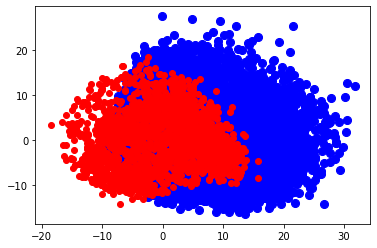

In [28]:
# plot data
plt.scatter(dataframe["1st principal"], dataframe["2nd principal"], color = "b", s = 65)
# plot outlier values
plt.scatter(dataframe2["1st principal"], dataframe2["2nd principal"], color = "r")

In [29]:
result_labels_clust = result_labels
for i in range(len(outlier_index)):
    result_labels_clust[outlier_index[i]] = 0
for i in range(len(result_labels_clust)):
    if result_labels_clust[i]!=0:
        result_labels_clust[i] = 1

In [30]:
result_images.insert(0,'label',result_labels_clust,True)

In [31]:
def clusteredness(df):
    df0 = df[df.label == 0]
    df1 = df[df.label == 1]
    df0 = df0.drop('label',axis='columns')
    df1 = df1.drop('label',axis='columns')

    df0_var = df0.var(1)
    df0_var = df0_var.var(0)
    df1_var = df1.var(1)
    df1_var = df1_var.var(0)

    return df1_var / df0_var

In [32]:
clusterness = clusteredness(result_images)
clusterness

0.8988846435362604